### 1. Importing and exploring the data

In [28]:
# import the necessary libraries
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# ignore all warnings
warnings. filterwarnings("ignore")

# load the dataset
df = pd.read_csv("aggregate_median_jams_Kota Depok.csv")
df.head()

,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,0,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Tole Iskandar,2,867.0,127.0,14.000000,1,33482698,2022-07-06,2.0,"LINESTRING (106.837496 -6.403788, 106.837451 -..."
1,1,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Bukit Cinere,3,421.0,92.0,10.260000,1,33482683,2022-07-06,3.0,"LINESTRING (106.793532 -6.339868, 106.79333 -6..."
2,2,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Tole Iskandar,3,1236.0,186.0,13.660000,11,33482699,2022-07-06,3.0,"MULTILINESTRING ((106.840781 -6.404241, 106.84..."
3,3,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Tol Depok-Antasari,1,5246.5,93.0,58.239998,2,33482697,2022-07-06,1.0,"LINESTRING (106.803629 -6.317554, 106.803488 -..."
4,4,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Sawangan Raya,3,344.0,106.0,8.640000,9,33482696,2022-07-06,3.0,"MULTILINESTRING ((106.773914 -6.395212, 106.77..."


In [3]:
# get a quick overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157218 entries, 0 to 157217
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 157218 non-null  int64  
 1   time                       157218 non-null  object 
 2   kemendagri_kabupaten_kode  157218 non-null  float64
 3   kemendagri_kabupaten_nama  157218 non-null  object 
 4   street                     154459 non-null  object 
 5   level                      157218 non-null  int64  
 6   median_length              157218 non-null  float64
 7   median_delay               157218 non-null  float64
 8   median_speed_kmh           157218 non-null  float64
 9   total_records              157218 non-null  int64  
 10  id                         157218 non-null  int64  
 11  date                       157218 non-null  object 
 12  median_level               157218 non-null  float64
 13  geometry                   15

In [4]:
# explore summary statistics of numerical columns
df.describe()

,Unnamed: 0,kemendagri_kabupaten_kode,level,median_length,median_delay,median_speed_kmh,total_records,id,median_level
count,157218.000000,1.572180e+05,157218.000000,157218.000000,157218.000000,157218.000000,157218.000000,1.572180e+05,157218.000000
mean,39313.451596,3.276000e+01,2.420181,777.908121,137.606693,12.808924,18.917796,3.542952e+07,2.420181
std,22708.898651,1.290065e-10,1.013765,582.178984,128.711199,7.397666,28.902927,1.105491e+06,1.013765
min,0.000000,3.276000e+01,1.000000,25.000000,-1.000000,0.000000,1.000000,3.348268e+07,1.000000
25%,19652.000000,3.276000e+01,2.000000,397.000000,74.000000,7.040000,4.000000,3.445209e+07,2.000000
50%,39304.000000,3.276000e+01,2.000000,647.000000,96.000000,11.930000,10.000000,3.540958e+07,2.000000
75%,58956.000000,3.276000e+01,3.000000,1030.000000,145.000000,17.035000,22.000000,3.638440e+07,3.000000
max,79827.000000,3.276000e+01,5.000000,17782.000000,3901.000000,67.480000,244.000000,3.729072e+07,5.000000


In [5]:
# explore categorical columns
df['street'].value_counts()

N8 Jalan Raya Bogor          3683
Margonda Raya                3632
Sawangan Raya                3537
Jalan Raya Bogor             3482
Tole Iskandar                3136
                             ... 
Jalan Kuta Raya                 1
Haji Cepit                      1
Haji Bantong                    1
Pamulang Elok                   1
Jalan Kelurahan Jatijajar       1
Name: street, Length: 968, dtype: int64

### 2. Data preprocessing

In [6]:
# check for missing values
print(df.isna().sum())
print("Number of missing values before dropping rows:", df.isna().sum().sum())

# drop rows with missing values
df = df.dropna()
df = df.reset_index(drop=True)
print("Number of missing values after dropping rows:", df.isna().sum().sum())

Unnamed: 0                      0
time                            0
kemendagri_kabupaten_kode       0
kemendagri_kabupaten_nama       0
street                       2759
level                           0
median_length                   0
median_delay                    0
median_speed_kmh                0
total_records                   0
id                              0
date                            0
median_level                    0
geometry                        0
dtype: int64
Number of missing values before dropping rows: 2759
Number of missing values after dropping rows: 0


In [7]:
# check for duplicates
print(df.duplicated().sum())
print("Number of duplicate rows before dropping duplicates:", df.duplicated().sum())

# drop duplicate rows
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print("Number of duplicate rows after dropping duplicates:", df.duplicated().sum())

0
Number of duplicate rows before dropping duplicates: 0
Number of duplicate rows after dropping duplicates: 0


In [8]:
# select columns to cluster
cluster_columns = ['street', 'level', 'median_length', 'median_delay', 'median_speed_kmh']
df = df[cluster_columns]

# define numerical and categorical columns
numerical_columns = ['median_length', 'median_delay', 'median_speed_kmh']
categorical_columns = ['street', 'level']

In [9]:
# create a copy of our data to be scaled
df_scale = df.copy()

# standard scale numerical features
df_scale[numerical_columns] = StandardScaler().fit_transform(df_scale[numerical_columns])
df_scale

,street,level,median_length,median_delay,median_speed_kmh
0,Tole Iskandar,2,0.141055,-0.084920,0.149554
1,Bukit Cinere,3,-0.622118,-0.355355,-0.355636
2,Tole Iskandar,3,0.772470,0.370957,0.103627
3,Tol Depok-Antasari,1,7.635043,-0.347628,6.125383
4,Sawangan Raya,3,-0.753877,-0.247181,-0.574462
...,...,...,...,...,...
154454,Gandul Raya,3,-0.562228,-0.459665,-0.121277
154455,N6 Cinangka Raya,3,-0.416780,-0.363082,0.277877
154456,Permata,1,-0.000970,-0.594883,0.774963
154457,Gandul Raya,2,-0.356890,-0.424895,0.037439


In [10]:
# checking for outliers
df_out = df_scale[(df_scale[numerical_columns].abs() <= 3).all(axis=1)]
df_out = df_out.reset_index(drop=True)
df_out.shape

(149533, 5)

In [11]:
# encode categorical columns
encoder = OneHotEncoder()
df_cat_encoded = encoder.fit_transform(df_out[categorical_columns])
cat_columns = encoder.get_feature_names(categorical_columns)

# convert the encoded categorical columns back to a dataframe
df_cat_encoded = pd.DataFrame(df_cat_encoded.toarray(), columns=cat_columns)

# combine numerical and encoded categorical columns
df_clustered = pd.concat([df_out[numerical_columns], df_cat_encoded], axis=1)
df_clustered = df_clustered.dropna()
df_clustered = df_clustered.reset_index(drop=True)
df_clustered

,median_length,median_delay,median_speed_kmh,street_Abdul Gani 1,street_Abdul Wahab,street_Abdurrahman,street_Acing,street_Adhi Karya 2,street_Akar Wangi 2,street_Akar Wangi 4,...,street_Wadas,street_Wahid Hasyim,street_Warujaya,street_Wijaya Kusuma,street_Yve Habitat Limo,level_1,level_2,level_3,level_4,level_5
0,0.141055,-0.084920,0.149554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.622118,-0.355355,-0.355636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.772470,0.370957,0.103627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.753877,-0.247181,-0.574462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.091661,-0.513753,0.189402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149528,-0.562228,-0.459665,-0.121277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
149529,-0.416780,-0.363082,0.277877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
149530,-0.000970,-0.594883,0.774963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
149531,-0.356890,-0.424895,0.037439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 3. Finding optimal numbers of clusters

### 3a. Clusters based on categorical (street & level) variables

Text(0, 0.5, 'Within-Cluster Sum of Squares')

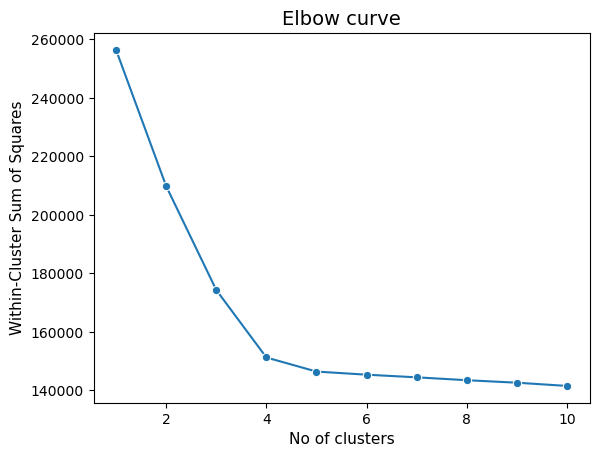

In [84]:
wcss = []

# calculate wcss for each number of categorical clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_cat_encoded)
    wcss.append(kmeans.inertia_)

# plot wcss against number of clusters
ax = sns.lineplot(x=list(range(1, 11)), y=wcss, marker="o")
ax.set_title('Elbow curve', fontsize=14)
ax.set_xlabel('No of clusters', fontsize=11)
ax.set_ylabel('Within-Cluster Sum of Squares', fontsize=11)

In [ ]:
silhouette_scores = []

# calculate silhouette score for each number of categorical clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_cat_encoded)
    silhouette_scores.append(silhouette_score(df_cat_encoded, kmeans.labels_))

# plot silhouette score against number of clusters
ax = sns.lineplot(x=list(range(2,11)), y=silhouette_scores, marker="o")
ax.set_title('Silhouette Scores', fontsize=14)
ax.set_xlabel('No of clusters', fontsize=11)
ax.set_ylabel('Score', fontsize=11)

#### Optimal number of clusters based on categorical variables: 4

### 3b. Clusters based on all variables:

Text(0, 0.5, 'Within-Cluster Sum of Squares')

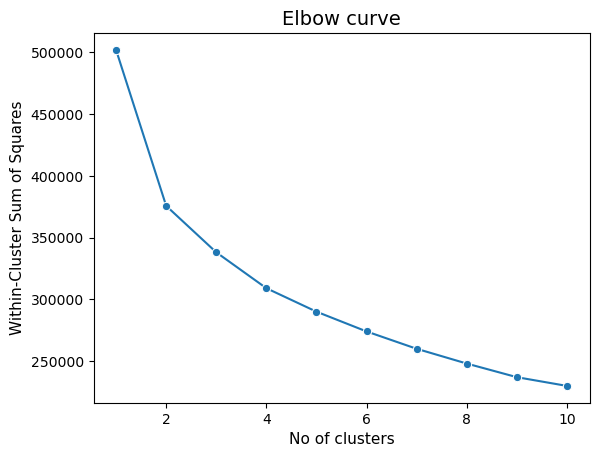

In [20]:
wcss = []

# calculate wcss for each number of cluster
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_clustered)
    wcss.append(kmeans.inertia_)

# plot wcss against number of clusters
ax = sns.lineplot(x=list(range(1, 11)), y=wcss, marker="o")
ax.set_title('Elbow curve', fontsize=14)
ax.set_xlabel('No of clusters', fontsize=11)
ax.set_ylabel('Within-Cluster Sum of Squares', fontsize=11)

Text(0, 0.5, 'Score')

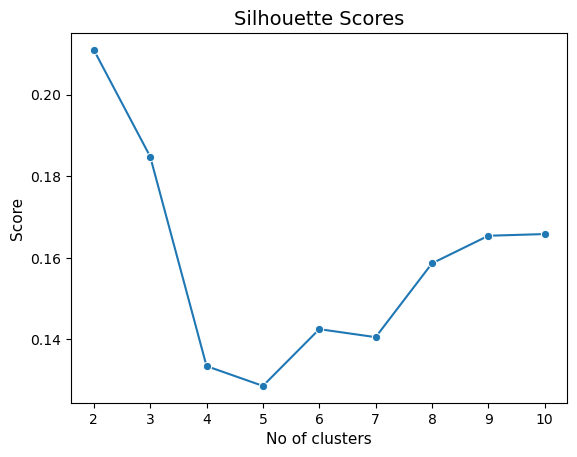

In [16]:
silhouette_scores = []

# calculate silhouette score for each number of cluster
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_clustered)
    silhouette_scores.append(silhouette_score(df_clustered, kmeans.labels_))

# plot silhouette score against number of clusters
ax = sns.lineplot(x=list(range(2,11)), y=silhouette_scores, marker="o")
ax.set_title('Silhouette Scores', fontsize=14)
ax.set_xlabel('No of clusters', fontsize=11)
ax.set_ylabel('Score', fontsize=11)

#### Optimal number of clusters based on all variables: 2

### 4. Clustering the data

In [22]:
# create cluster based on categorical variables
k = 4
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(df_cat_encoded)

# add the cluster labels to the DataFrame
df_out['cluster_categorical'] = labels
df_out.head()

,street,level,median_length,median_delay,median_speed_kmh,cluster_street,cluster_all,cluster_categorical
0,Tole Iskandar,2,0.141055,-0.084920,0.149554,1,1,1
1,Bukit Cinere,3,-0.622118,-0.355355,-0.355636,3,0,0
2,Tole Iskandar,3,0.772470,0.370957,0.103627,3,1,0
3,Sawangan Raya,3,-0.753877,-0.247181,-0.574462,3,0,0
4,Raden Saleh,2,-0.091661,-0.513753,0.189402,1,1,1


In [23]:
# create cluster based on all variables
k = 2
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(df_clustered)

# add the cluster labels to the DataFrame
df_out['cluster_all'] = labels
df_out.head()

,street,level,median_length,median_delay,median_speed_kmh,cluster_street,cluster_all,cluster_categorical
0,Tole Iskandar,2,0.141055,-0.084920,0.149554,1,1,1
1,Bukit Cinere,3,-0.622118,-0.355355,-0.355636,3,0,0
2,Tole Iskandar,3,0.772470,0.370957,0.103627,3,1,0
3,Sawangan Raya,3,-0.753877,-0.247181,-0.574462,3,0,0
4,Raden Saleh,2,-0.091661,-0.513753,0.189402,1,1,1


### 5. Exploring the clusters

In [24]:
# size of each cluster_categorical
df_out["cluster_categorical"].value_counts()

1    53602
0    46031
2    30830
3    19070
Name: cluster_categorical, dtype: int64

In [25]:
# size of each cluster_all
df_out["cluster_all"].value_counts()

0    80544
1    68989
Name: cluster_all, dtype: int64

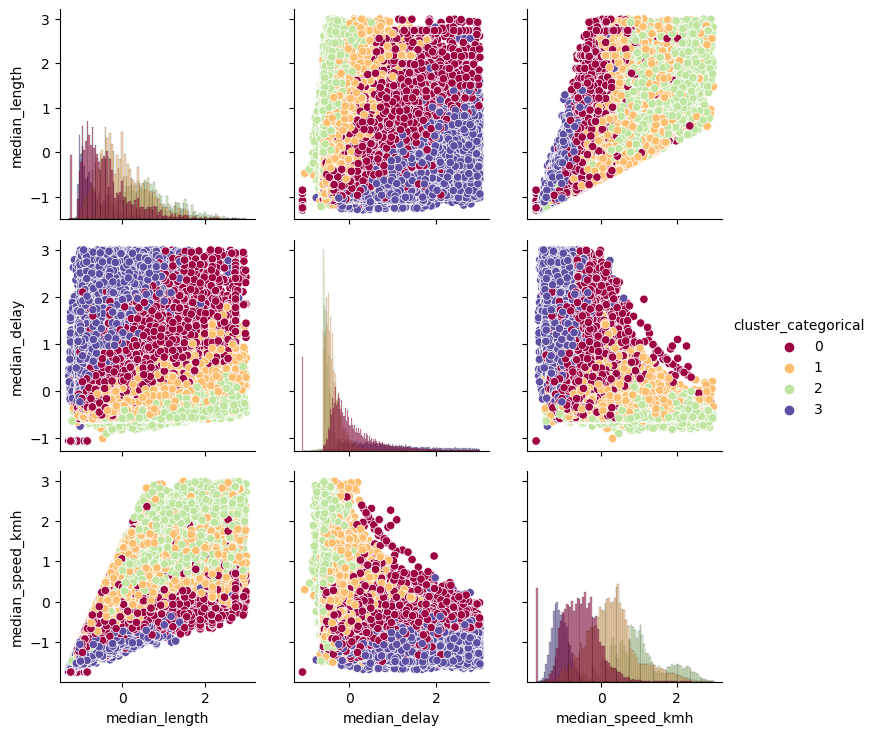

In [39]:
# cluster_categorical numerical data exploration
g = sns.PairGrid(df_out[['median_length', 'median_delay', 'median_speed_kmh', 'cluster_categorical']], hue = "cluster_categorical", palette = 'Spectral')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

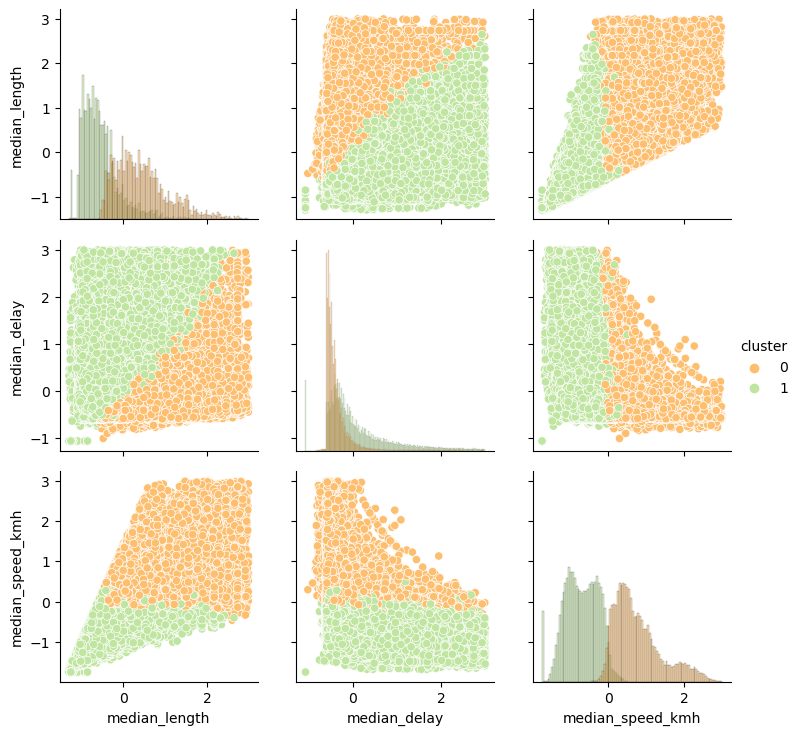

In [62]:
# cluster_all numerical data exploration
g = sns.PairGrid(df_out[['median_length', 'median_delay', 'median_speed_kmh', 'cluster_all']], hue = "cluster_all", palette = 'Spectral')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

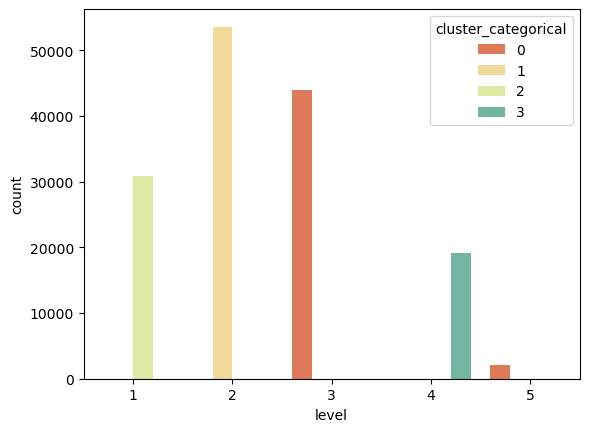

In [38]:
# categorical data exploration
ax = sns.countplot(data = df_out, x="level", hue = "cluster_categorical", palette = 'Spectral')

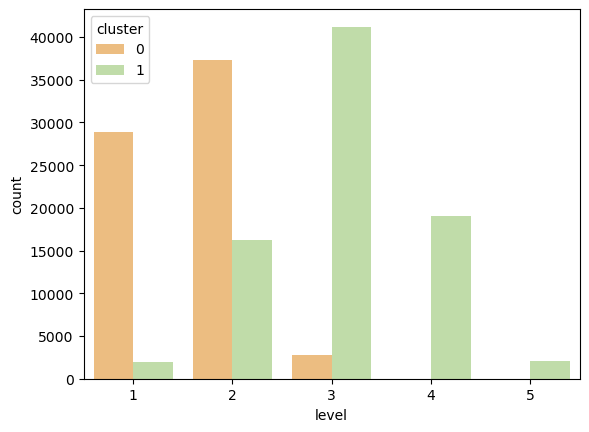

In [65]:
# categorical data exploration
ax = sns.countplot(data = df_out, x="level", hue = "cluster", palette = 'Spectral')

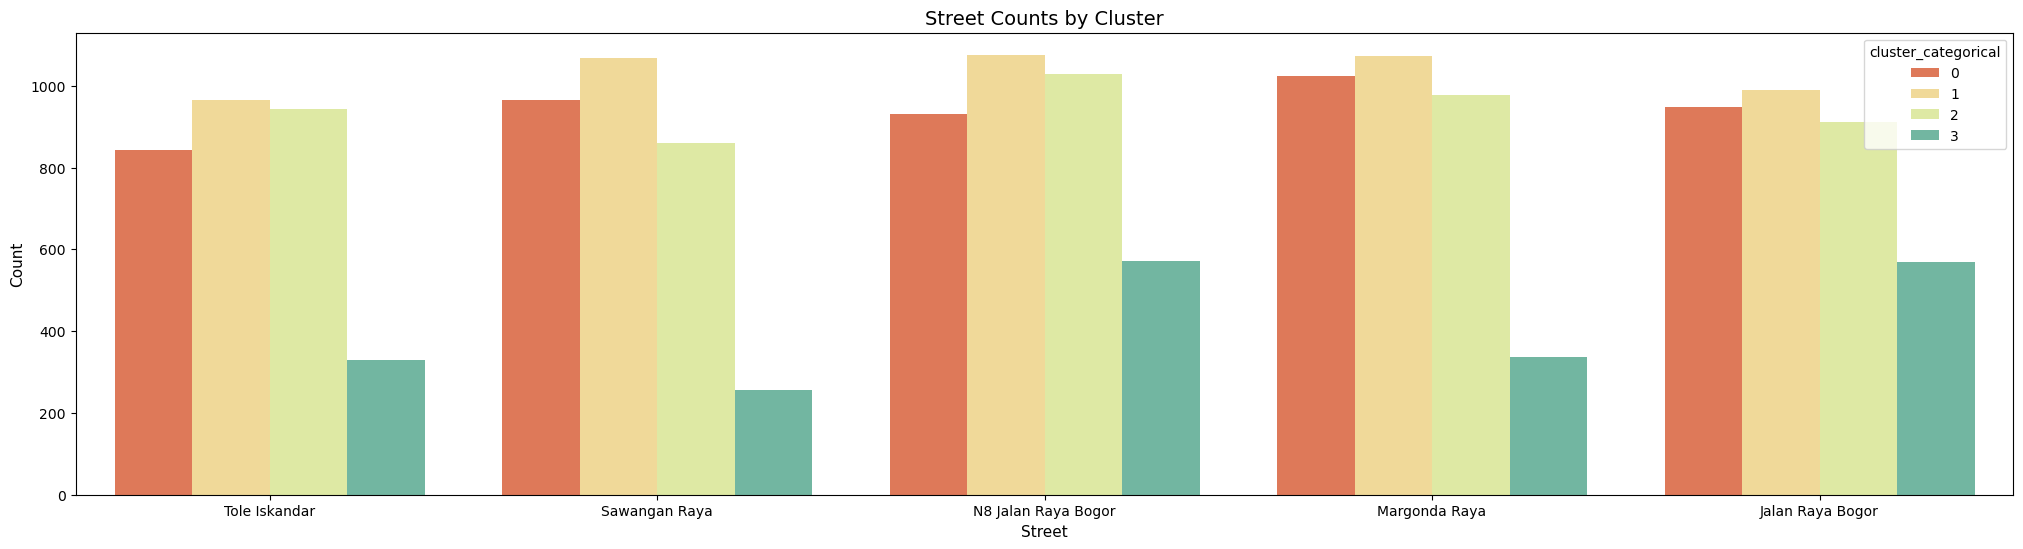

In [37]:
# limit to top 5 streets due to huge amount of categories
top_streets = df_out['street'].value_counts().nlargest(5).index.tolist()
df_top_streets = df_out[df_out['street'].isin(top_streets)]

# create a new figure object with the desired figsize
plt.figure(figsize=(25,6))

# create the countplot for the top 5 streets
ax = sns.countplot(data=df_top_streets, x="street", hue="cluster_categorical", palette='Spectral')

# set the title and axis labels
ax.set_title("Street Counts by Cluster", fontsize=14)
ax.set_xlabel("Street", fontsize=11)
ax.set_ylabel("Count", fontsize=11)

# show the plot
plt.show()

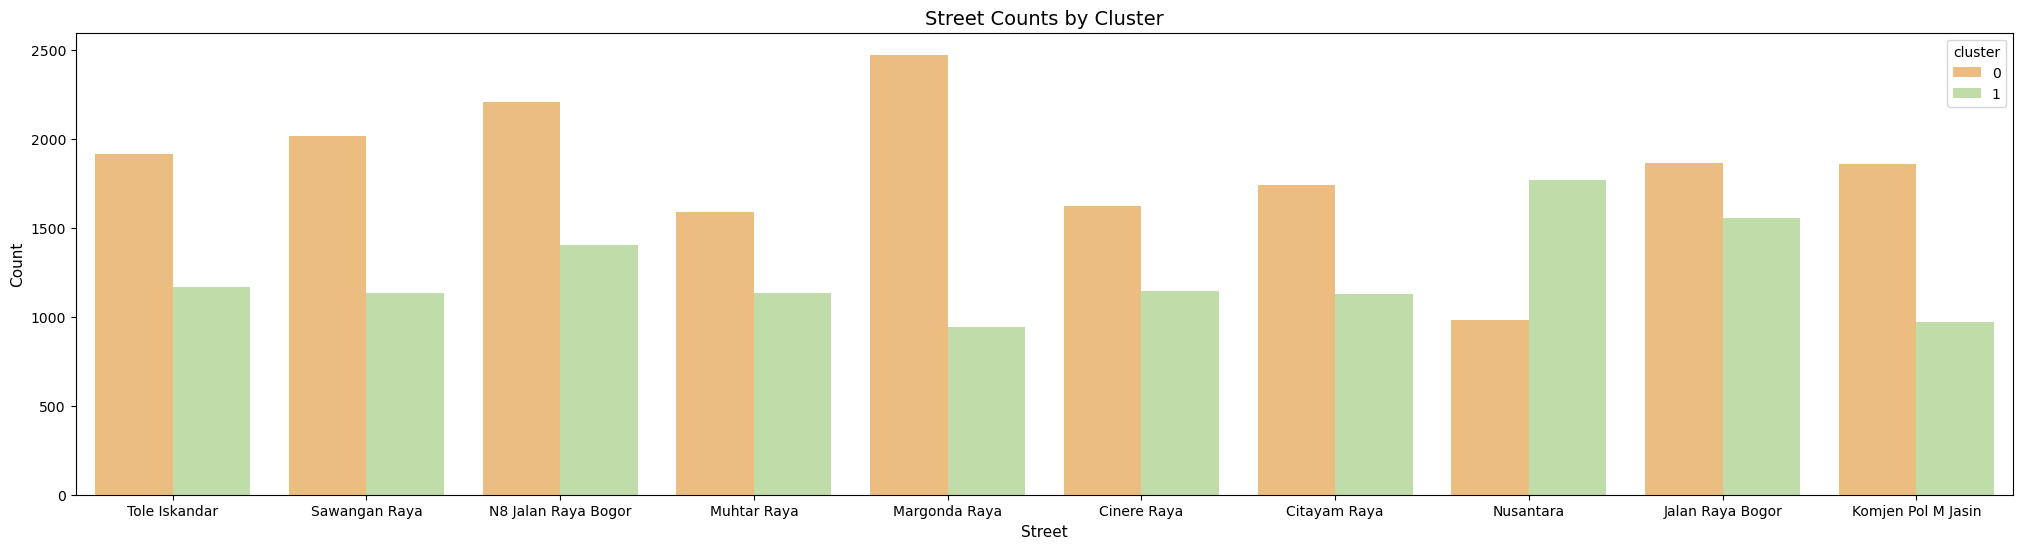

In [75]:
# limit to top 10 streets due to huge amount of categories
top_streets = df_out['street'].value_counts().nlargest(10).index.tolist()
df_top_streets = df_out[df_out['street'].isin(top_streets)]

# create a new figure object with the desired figsize
plt.figure(figsize=(25,6))

# create the countplot for the top 10 streets
ax = sns.countplot(data=df_top_streets, x="street", hue="cluster", palette='Spectral')

# set the title and axis labels
ax.set_title("Street Counts by Cluster", fontsize=14)
ax.set_xlabel("Street", fontsize=11)
ax.set_ylabel("Count", fontsize=11)

# show the plot
plt.show()